# Taller 1: operaciones elementales sobre imágenes

La estenografía es la práctica de esconder mensajes ocultos a través de otros medios, de tal manera que estos pasen desapercibidos para los observadosres. Si bien existen muchas maneras de cifrar mensajes, a menudo con enmascaramiento, filtrado, o manipulación, probablemente una de las técnicas más simples y comunes tiene que ver con la inserción en los bits menos significativos de una imagen.

Se le ha encargado a usted implementar un método que sea capaz, a través del procesamiento de imágenes, de interceptar mensajes secretos cifrados a través del envío de fotografías en escala de grises. La única información que posee es que el mensaje se encuentra oculto en más de 2 planos binarios de la imagen.

Usted debe recuperar el mensaje secreto y presentarlo en su notebook, usando únicamente operaciones básicas sobre la imagen.

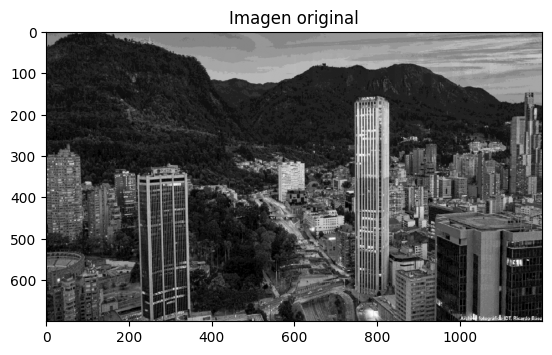

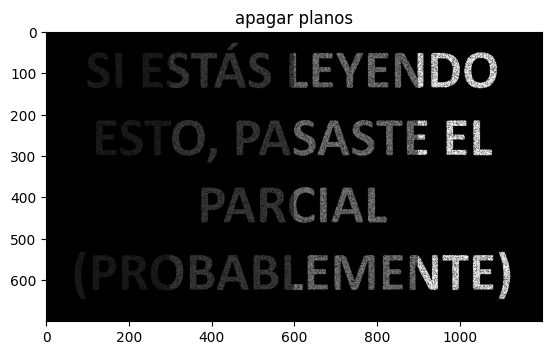

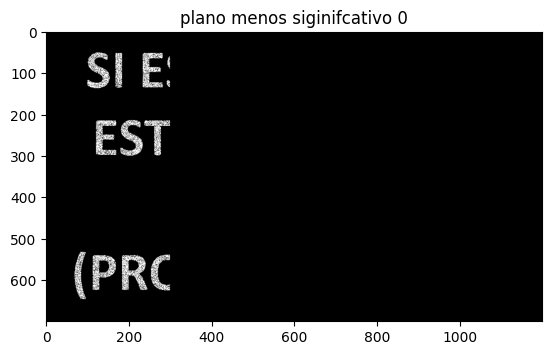

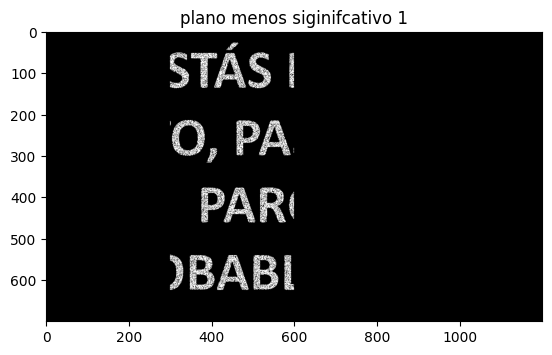

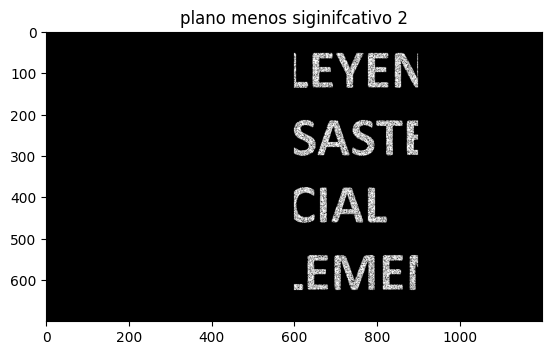

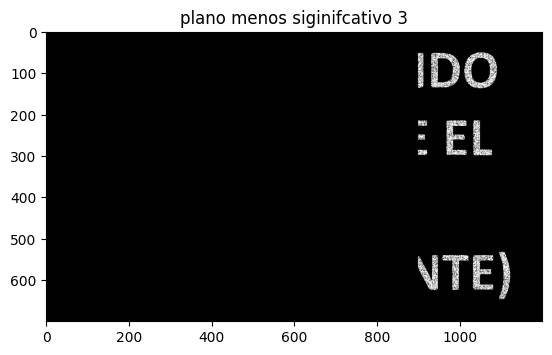

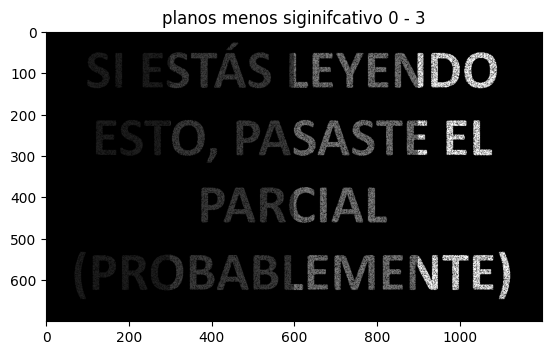

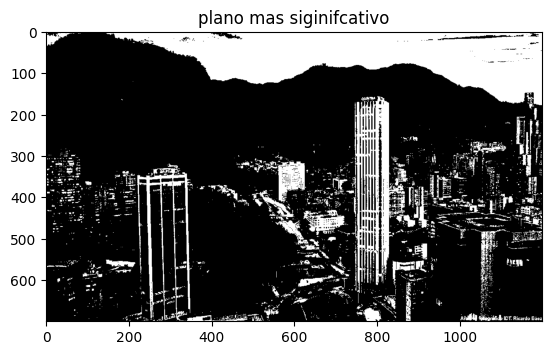

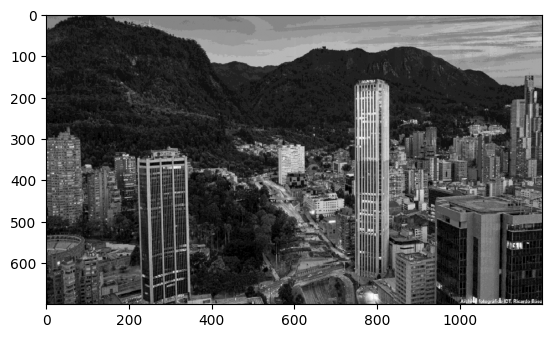

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("imagenes/ImagenBogota.png", cv2.IMREAD_GRAYSCALE)

# Visualizar imagen (MUSCLE)
plt.imshow(image, cmap="gray")
plt.title("Imagen original")
plt.show()

# Cuantificacion de una imagen
def image_quantization(imagen, k):
    plane = np.full((imagen.shape[0], imagen.shape[1]), 255-2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

# Apagar planos
img_5bits = image.copy()
for k in [4,5,6,7]:
    img_5bits = image_quantization(img_5bits, k)
    
plt.imshow(img_5bits, cmap="gray")
plt.title("apagar planos")
plt.show()

# Hacer slicing

def bit_plane_slicing(imagen, k):
    plane = np.full((imagen.shape[0], imagen.shape[1]), 2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

plane = bit_plane_slicing(image,0)
plane1 = bit_plane_slicing(image,1)
plane2 = bit_plane_slicing(image,2)
plane3 = bit_plane_slicing(image,3)
plane4 = bit_plane_slicing(image,4)
plane5 = bit_plane_slicing(image,5)
plane6 = bit_plane_slicing(image,6)
plane7 = bit_plane_slicing(image,7)

image_reconstructed = (plane+plane1+plane2+plane3+plane4+plane5+plane6+plane7)

plt.imshow(plane, cmap="gray")
plt.title("plano menos siginifcativo 0")
plt.show()

plt.imshow(plane1, cmap="gray")
plt.title("plano menos siginifcativo 1")
plt.show()

plt.imshow(plane2, cmap="gray")
plt.title("plano menos siginifcativo 2")
plt.show()

plt.imshow(plane3, cmap="gray")
plt.title("plano menos siginifcativo 3")
plt.show()

plt.imshow((plane+plane1+plane2+plane3), cmap="gray")
plt.title("planos menos siginifcativo 0 - 3")
plt.show()

plt.imshow(plane7, cmap="gray")
plt.title("plano mas siginifcativo")
plt.show()

plt.imshow(image_reconstructed, cmap="gray")
plt.show()


**RTA/** Usando cuantificación, encontramos el mensaje oculto en los 4 primeros planos menos significativos.